Density estimation using Kernel Density estimation

In [110]:
# Import libreraies
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.neighbors import KernelDensity

#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

#import GPy

#GPy.plotting.change_plotting_library('plotly')
#sns.set()

Create underlying function and observations.

In [134]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
#y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
print(x)

[[ 0.        ]
 [ 0.01001001]
 [ 0.02002002]
 [ 0.03003003]
 [ 0.04004004]
 [ 0.05005005]
 [ 0.06006006]
 [ 0.07007007]
 [ 0.08008008]
 [ 0.09009009]
 [ 0.1001001 ]
 [ 0.11011011]
 [ 0.12012012]
 [ 0.13013013]
 [ 0.14014014]
 [ 0.15015015]
 [ 0.16016016]
 [ 0.17017017]
 [ 0.18018018]
 [ 0.19019019]
 [ 0.2002002 ]
 [ 0.21021021]
 [ 0.22022022]
 [ 0.23023023]
 [ 0.24024024]
 [ 0.25025025]
 [ 0.26026026]
 [ 0.27027027]
 [ 0.28028028]
 [ 0.29029029]
 [ 0.3003003 ]
 [ 0.31031031]
 [ 0.32032032]
 [ 0.33033033]
 [ 0.34034034]
 [ 0.35035035]
 [ 0.36036036]
 [ 0.37037037]
 [ 0.38038038]
 [ 0.39039039]
 [ 0.4004004 ]
 [ 0.41041041]
 [ 0.42042042]
 [ 0.43043043]
 [ 0.44044044]
 [ 0.45045045]
 [ 0.46046046]
 [ 0.47047047]
 [ 0.48048048]
 [ 0.49049049]
 [ 0.5005005 ]
 [ 0.51051051]
 [ 0.52052052]
 [ 0.53053053]
 [ 0.54054054]
 [ 0.55055055]
 [ 0.56056056]
 [ 0.57057057]
 [ 0.58058058]
 [ 0.59059059]
 [ 0.6006006 ]
 [ 0.61061061]
 [ 0.62062062]
 [ 0.63063063]
 [ 0.64064064]
 [ 0.65065065]
 [ 0.66066

Import data

In [22]:
data=pd.read_csv('/Users/andreassolders/Box Sync/AlFONS_shared/Measurments/Measurement_IGISOL_2019/Homogenity/homo_sel.csv')
data['hit']=np.ones(len(data.index))
data.head()

,x_pos_d,y_pos_d,angle,radius,hit
0,-0.8250,-0.5280,290.560415,1.534761,1.0
1,1.6170,0.0495,343.916350,3.102435,1.0
2,-4.8015,2.1120,160.711810,3.641925,1.0
3,-0.7425,5.6760,82.571932,4.807343,1.0
4,4.7025,1.6500,6.963966,6.111588,1.0


(-25, 25)

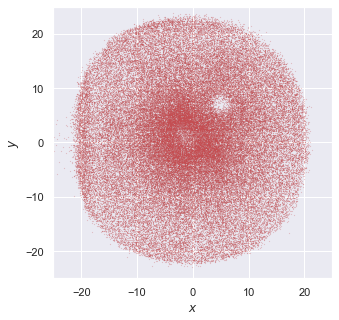

In [109]:
# Plot the data
plt.figure(figsize=[5,5])
plt.plot(data.x_pos_d, data.y_pos_d, 'r.', markersize=0.2, label='hits')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-25, 25)
plt.xlim(-25, 25)


Text(0.5, 0, 'x')

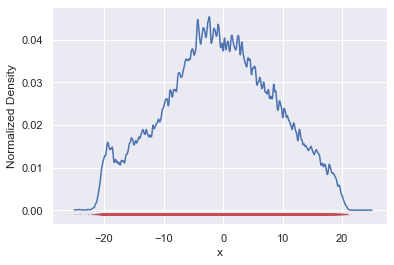

In [125]:
# Kernel Density estimation in x

X_plot = np.linspace(-25, 25, 1000)#[:, np.newaxis]#.transpose() # x-values for fitted result

kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.x_pos_d[:, np.newaxis])
log_dens = kde.score_samples(X_plot[:, np.newaxis])

#print(log_dens)
#plt.ylim(-0.01, 0.05)
plt.plot(X_plot, np.exp(log_dens))

plt.plot(data.x_pos_d,data.hit*(-0.001), 'r.', markersize=0.1)
plt.ylabel('Normalized Density')
plt.xlabel('x')

Text(0.5, 0, 'r')

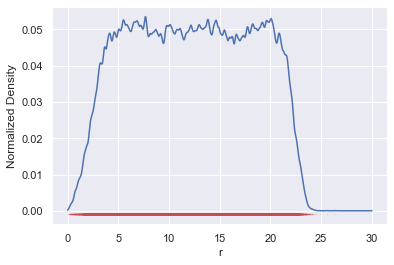

In [118]:
# Kernel Density estimation in r

X_plot = np.linspace(0, 30, 1000)#[:, np.newaxis]#.transpose() # x-values for fitted result

kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.radius[:, np.newaxis])
log_dens = kde.score_samples(X_plot[:, np.newaxis])

#print(log_dens)

plt.plot(X_plot, np.exp(log_dens))

plt.plot(data.radius,data.hit*(-0.001), 'r.', markersize=0.1)
plt.ylabel('Normalized Density')
plt.xlabel('r')

Text(0.5, 0, '$\\phi$')

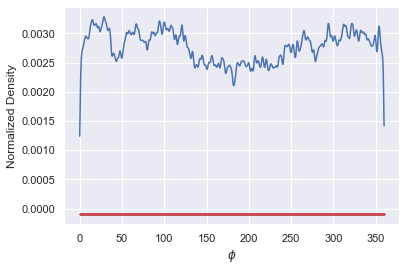

In [128]:
# Kernel Density estimation in angle

X_plot = np.linspace(0, 360, 1000)# x-values for fitted result

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(data.angle[:, np.newaxis])
log_dens = kde.score_samples(X_plot[:, np.newaxis])

#print(log_dens)

plt.plot(X_plot, np.exp(log_dens))
plt.plot(data.angle,data.hit*(-0.0001), 'r.', markersize=0.1)
plt.ylabel('Normalized Density')
plt.xlabel('$\phi$')

Not possible to use periodic boundary conditions?

In [107]:
# Kernel Density estimation in 2D


def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

xx, yy, zz = kde2D(data.x_pos_d, data.y_pos_d, 1.00)


Text(0, 0.5, '$y$')

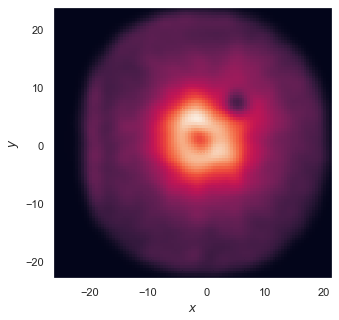

In [108]:
# Plot 2D
plt.figure(figsize=[5,5])
plt.pcolormesh(xx, yy, zz)
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.ylim(-25, 25)
#plt.xlim(-25, 25)

## Example with GP

In [43]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

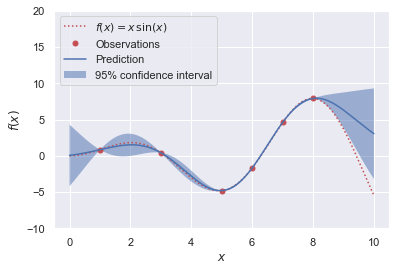

In [12]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')